In [64]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from urllib.request import urlopen

In [65]:
date=pd.date_range('2022-4-1',periods=100,freq='D')
date

DatetimeIndex(['2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12',
               '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16',
               '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-04-30', '2022-05-01', '2022-05-02',
               '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06',
               '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10',
               '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14',
               '2022-05-15', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20', '2022-05-21', '2022-05-22',
               '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
      

In [66]:
# 데이터 가져오기
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = 'http://movie.naver.com/' + \
    'movie/sdb/rank/rmovie.naver?sel=cur&date={date}'
    
    response = urlopen(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, 'html.parser')
    end = len(soup.find_all('div', 'tit5'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div','tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td','point')[n].string for n in range(0, end)])
  

In [67]:
# movie_list 데이터프레임 생성
movie_list = pd.DataFrame({'날짜' : movie_date,
                           '영화명' : movie_name,
                           '평점' : movie_point})
movie_list.head()

,날짜,영화명,평점
0,2022-04-01,씽2게더,9.41
1,2022-04-01,패왕별희 디 오리지널,9.31
2,2022-04-01,극장판 주술회전 0,9.27
3,2022-04-01,해피 투게더,9.19
4,2022-04-01,코다,9.16


In [69]:
# 평점을 숫자형으로 바꾸기
movie_list['평점'] = pd.to_numeric(movie_list['평점'])
movie_list.head()

,날짜,영화명,평점
0,2022-04-01,씽2게더,9.41
1,2022-04-01,패왕별희 디 오리지널,9.31
2,2022-04-01,극장판 주술회전 0,9.27
3,2022-04-01,해피 투게더,9.19
4,2022-04-01,코다,9.16


In [70]:
# 영화별 100일간 평점 평균 구하기
grouped_movie_list = pd.DataFrame(movie_list.groupby('영화명')['평점'].agg('mean').reset_index())
grouped_movie_list.head()

,영화명,평점
0,82년생 김지영,6.670000
1,개를 훔치는 완벽한 방법,9.000000
2,걸어도 걸어도,8.627407
3,경계선,8.200000
4,고스트 스토리,7.631667


In [72]:
# top5 구하기
movies_top5 = list(grouped_movie_list.sort_values('평점', ascending=False)[:5]['영화명'])
movies_top5

['탑건: 매버릭', '범죄도시2', '씽2게더', '시네마 천국', '언터처블: 1%의 우정']

In [74]:
# 1~5위 영화에 대한 데이터프레임 생성
movies_top5 = list(grouped_movie_list.sort_values('평점', ascending=False)[:5]['영화명'])
movies_top5_data = pd.DataFrame()

for movie in movies_top5:
    df = movie_list[movie_list['영화명'] == movie]
    tmp = pd.DataFrame(df.groupby('날짜')['평점'].agg('mean').reset_index())
    tmp['영화명'] = movie
    movies_top5_data = pd.concat([movies_top5_list, tmp])

# 피벗 테이블 생성
movie_pivot = pd.pivot_table(movies_top5_data, index=['날짜'], columns=['영화명'], values=['평점'])
movie_pivot.columns = movie_pivot.columns.droplevel()

# matplotlib import 및 한글폰트 꺠짐 방지
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager,rc
plt.rcParams['axes.unicode_minus'] = False

f_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

# 그래프 그리기
target_col = movies_top5
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

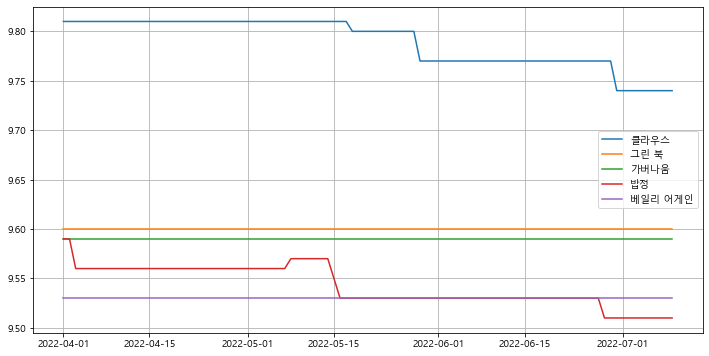

In [51]:
'''
1. 100일간 날짜 저장
2. bs4를 사용하여 날짜별 "영화명", "평점" 긁어오기
3. movie dataframe만들기
4. movie dataframe의 pivot_table만들어두자
5. 1~5위 영화명 추출
6. 시각화
'''
from urllib.request import urlopen
from bs4 import BeautifulSoup

# 1. 100일간 날짜 저장
import pandas as pd
date = pd.date_range('2022-4-1',periods=100,freq='D') # 20220401부터 100일간

# 2.bs4를 사용하여 날짜별 "영화명", "평점" 긁어오기
import urllib
from tqdm import tqdm_notebook
movie_date  = []
movie_name  = []
movie_point = []

for today in tqdm_notebook(date):
    html = 'https://movie.naver.com/' + \
        'movie/sdb/rank/rmovie.naver?sel=pnt&date={date}'
    response = urlopen(html.format(date=
                                  urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, 'lxml')
    end = len(soup.find_all('td', class_='point'))
    
    movie_date.extend([today for n in range(end)])
    movie_name.extend([soup.find_all('div',class_="tit5")[n].a.string for n in range(end)])
    movie_point.extend([soup.find_all('td',class_="point")[n].string for n in range(end)])

# 3. movie dataframe만들기
movie = pd.DataFrame({
    "date":movie_date
    ,"name":movie_name
    ,"point":movie_point
})
movie['point'] = movie['point'].astype(float) # movie.info() # 별점 타입 변경 object -> float

# 4. movie dataframe의 pivot_table만들어두자
movie_pivot = pd.pivot_table(movie
                           , index=['date']
                           , columns=['name']
                           , values=['point'])
movie_pivot.columns = movie_pivot.columns.droplevel() # level에 놓인 point 제거


# 5. 1~5위 영화명 추출
import numpy as np
movie_unique = pd.pivot_table(movie, index='name', aggfunc=np.sum) # 영화마다 점수 합
movie_best = movie_unique.sort_values(by='point', ascending=False)
top5 = movie_best[:5].copy()
top5.reset_index(inplace=True) # 최상위 point라는 level 제거를 위해

# 6.시각화
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # 폰트
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

target_col = top5['name']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()

In [3]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup

url_base = 'https://www.chicagomag.com'
url_sub = '/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'

url = Request(url_base + url_sub, headers={'User-Agent':'Mozilla/5.0'})
html = urlopen(url)
soup = BeautifulSoup(html,'html.parser')
soup

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>The 50 Best Sandwiches in Chicago – Chicago Magazine</title>
<style type="text/css">
					.heateor_sss_button_instagram span.heateor_sss_svg,a.heateor_sss_instagram span.heateor_sss_svg{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}
						div.heateor_sss_horizontal_sharing a.heateor_sss_button_instagram span{background:#000!important;}div.heateor_sss_standard_follow_icons_container a.heateor_sss_button_instagram span{background:#000;}
										.heateor_sss_horizontal_sharing .heateor_sss_svg,.heateor_sss_standard_follow_icons_container .heateor_sss_svg{
							background-color: #000!important;
				background: #000!important;
							color: #fff;
						border-width: 0px;
			border-style: solid;
			border-color: transparent;
		}
					.heateor_sss_horiz

In [8]:
tmp_total = soup.find_all(class_='sammy')

In [16]:
tmp_total[0]

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>

In [15]:
tmp_total[0].find(class_='sammyRank').get_text()

'1'

In [33]:
import re

tmp_total[0].find('a')['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

In [42]:
import requests
from requests.compat import urljoin

rank = []
main_menu = []
cafe_name = []
url_add = []

list_soup = soup.find_all('div','sammy')

for item in list_soup:
    menu, name, temp = re.split(('\n|\r\n'),item.find(class_='sammyListing').get_text())
    rank.append(item.find(class_='sammyRank').get_text())
    main_menu.append(menu)
    cafe_name.append(name)
    url_add.append(urljoin(url_base,item.find('a')['href'])) 

len(rank), len(main_menu), len(cafe_name), len(url_add)

(50, 50, 50, 50)

url을 절대경로로 만들자

In [44]:
from tqdm import tqdm_notebook
import time

import requests
from requests.compat import urljoin

rank = []
main_menu = []
cafe_name = []
url_add = []

list_soup = soup.find_all('div','sammy')
bar_total = tqdm_notebook(list_soup) #

for item in bar_total:
    menu, name, temp = re.split(('\n|\r\n'),item.find(class_='sammyListing').get_text())
    rank.append(item.find(class_='sammyRank').get_text())
    main_menu.append(menu)
    cafe_name.append(name)
    url_add.append(urljoin(url_base,item.find('a')['href'])) 
    time.sleep(0.05)

len(rank), len(main_menu), len(cafe_name), len(url_add)

(50, 50, 50, 50)

In [46]:
import pandas as pd
data = {
    'Rank':rank
    ,'Menu':main_menu
    ,'Cafe':cafe_name
    ,'URL': url_add
}
df = pd.DataFrame(data,columns=['Rank','Cafe','Menu','URL'])
df.head(3)

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...


In [47]:
df.to_csv('../data/03. best_sandwiches_chicago.csv', sep=',', encoding='utf-8')

In [85]:
df = pd.read_csv('../data/03. best_sandwiches_chicago.csv', index_col=0)
df.head(3)

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...


In [86]:
url = Request(df['URL'][0], headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(url)
soup_tmp = BeautifulSoup(html,'html.parser')
soup_tmp

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>1. Old Oak Tap BLT – Chicago Magazine</title>
<style type="text/css">
					.heateor_sss_button_instagram span.heateor_sss_svg,a.heateor_sss_instagram span.heateor_sss_svg{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}
						div.heateor_sss_horizontal_sharing a.heateor_sss_button_instagram span{background:#000!important;}div.heateor_sss_standard_follow_icons_container a.heateor_sss_button_instagram span{background:#000;}
										.heateor_sss_horizontal_sharing .heateor_sss_svg,.heateor_sss_standard_follow_icons_container .heateor_sss_svg{
							background-color: #000!important;
				background: #000!important;
							color: #fff;
						border-width: 0px;
			border-style: solid;
			border-color: transparent;
		}
					.heateor_sss_horizontal_sharing .

In [60]:
soup_tmp.find('p','addy').get_text().split()

['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']

In [61]:
soup_tmp.find('p','addy').get_text().split()[0]

'$10.'

In [64]:
' '.join(soup_tmp.find('p','addy').get_text().split()[1:-2])

'2109 W. Chicago Ave.,'

In [67]:
df.head(1)

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...


In [71]:
df['URL'][1]

'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/'

In [87]:
# price = []
# address = []

# for n in range(3):
#     url = Request(df['URL'][n], headers={'User-Agent':'Mozilla/5.0'})
#     html = urlopen(url)
#     soup_tmp = BeautifulSoup(html,'lxml')
    
#     gettings = soup_tmp.find('p','addy').get_text()
    
#     price.append(gettings.split()[0][:-1])
#     address.append(' '.join(gettings.split())[1:-2])
#     time.sleep(0.03)
# price

['$10', '$9', '$9.50']

In [88]:
from tqdm import tqdm_notebook
price   = []
address = []

for n in tqdm_notebook(df.index):
    url = Request(df['URL'][n], headers={'User-Agent':'Mozilla/5.0'})
    html = urlopen(url)
    soup_tmp = BeautifulSoup(html, 'lxml') # lxml이 html.parser보다 빨라서 
    
    gettings = soup_tmp.find('p','addy').get_text()

    price.append(gettings.split()[0][:-1]) # '.'뺴려고 -1까지
    address.append(' '.join(gettings.split()[1:-2]))
    time.sleep(0.03)



In [95]:
df['Price']=price
df['Address']=address
df.head(3)
df = df.loc[:,['Rank','Cafe','Menu','Price','Address']] # 
df.head(3)

,Rank,Cafe,Menu,Price,Address
0,1,Old Oak Tap,BLT,$10,"2109 W. Chicago Ave.,"
1,2,Au Cheval,Fried Bologna,$9,"800 W. Randolph St.,"
2,3,Xoco,Woodland Mushroom,$9.50,"445 N. Clark St.,"


In [96]:
import googlemaps
gmaps_key = '~~'
gmaps = googlemaps.Client(key=gmaps_key)

In [97]:
import numpy as np
np.sum(df['Address']=='Multiple')

6

In [98]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

In [106]:
lat = []
lng = []

for n in tqdm_notebook(df.index): # 0~49
    if df['Address'][n] != 'Multiple':
        target_name = df['Address'][n]+', '+'Chicago'
        gmaps_output = gmaps.geocode(target_name) 
        
        location_output = gmaps_output[0].get('geometry')
        
        lat.append(location_output['location']['lat'])
        lng.append(location_output['location']['lng'])
    else:
        lat.append(np.nan)
        lng.append(np.nan)

In [108]:
df['lat'] = lat
df['lng'] = lng
df.head(3)

,Rank,Cafe,Menu,Price,Address,lat,lng
0,1,Old Oak Tap,BLT,$10,"2109 W. Chicago Ave.,",41.895558,-87.679967
1,2,Au Cheval,Fried Bologna,$9,"800 W. Randolph St.,",41.884639,-87.647590
2,3,Xoco,Woodland Mushroom,$9.50,"445 N. Clark St.,",41.890523,-87.630783


In [111]:
import folium
mapping = folium.Map(location=[df['lat'].mean(),df['lng'].mean()]
                     ,zoom_start=11
                    )
folium.Marker([df['lat'].mean(), df['lng'].mean()]
             ,popup='center'
             ).add_to(mapping)
mapping

In [115]:
map = folium.Map(location=[df['lat'].mean(), df['lng'].mean()],zoom_start=11)

for i in df.index:
    if df['Address'][i] != 'Multiple':
        folium.Marker([df['lat'][i], df['lng'][i]]
                     ,popup=df['Cafe'][i]
                     ).add_to(map)
map

In [118]:
from folium.plugins import MarkerCluster
mc = MarkerCluster()

map = folium.Map(location=[df['lat'].mean(), df['lng'].mean()]
                ,zoom_start=11)
for i in df.index:
    if df['Address'][i] != 'Multiple':
        mc.add_child(folium.Marker(location=[df['lat'][i], df['lng'][i]]
                                  , popup=df['Cafe'][i]))
        
map.add_child(mc)
map